In [57]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from copy import deepcopy as copy
import matplotlib.backends.backend_pdf
import scipy as sp
import scipy.stats as stats
import math
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
# plotly.tools.set_credentials_file(username='mhossa10', api_key='CSWpOV3xHUVRzimjfHSB')

In [58]:
color_list1 = ['#1b9e77', '#d95f02', '#7570b3', '#e7298a', '#66a61e', '#e6ab02']
color_list2 = ['#e41a1c', '#377eb8', '#4daf4a', '#984ea3', '#ff7f00', '#ffff33']
color_list3 = ['#a6cee3', '#1f78b4', '#b2df8a', '#33a02c', '#fb9a99', '#e31a1c']

,NonZeroPerRow,M,N,AvgTime,TotalRun,NonZeroElements,Bandwidth,Flops,Partition,ValueType
0,1.0,500000,1000000,0.573093,1000,500000,31.252905,1.953306,416,8
1,2.0,500000,1000000,0.656441,1000,1000000,44.477745,3.421365,416,8
2,3.0,500000,1000000,0.876989,1000,1500000,44.652590,3.721049,416,8
3,4.0,500000,1000000,1.148442,1000,2000000,42.581254,3.702717,416,8
4,5.0,500000,1000000,1.385832,1000,2500000,43.227792,3.859624,416,8
5,6.0,500000,1000000,1.730694,1000,3000000,39.469504,3.588137,416,8
6,7.0,500000,1000000,1.782317,1000,3500000,44.972133,4.142170,416,8
7,8.0,500000,1000000,1.886137,1000,4000000,48.020540,4.467027,416,8
8,9.0,500000,1000000,2.151429,1000,4500000,46.538332,4.362969,416,8
9,10.0,500000,1000000,2.341140,1000,5000000,47.200137,4.452843,416,8


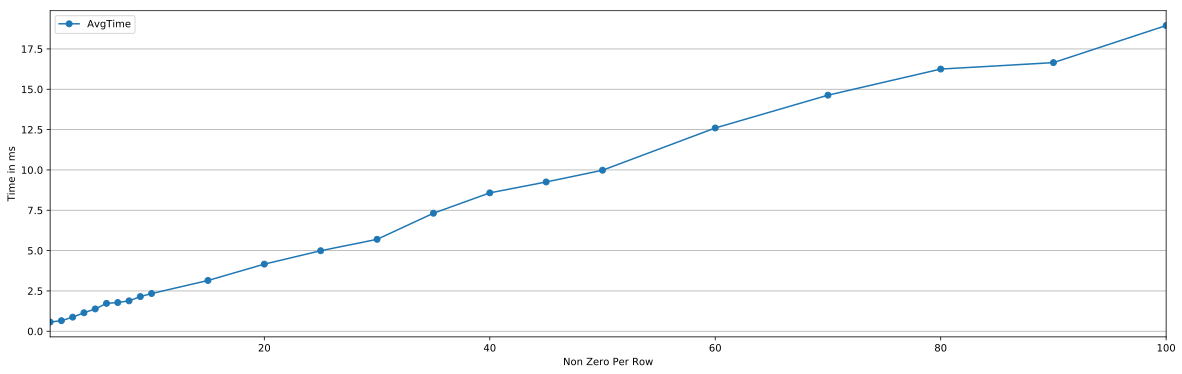

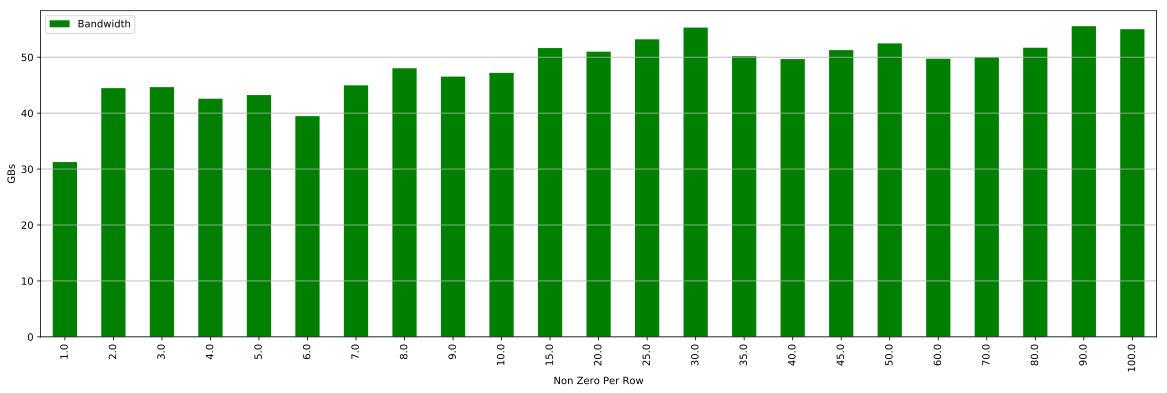

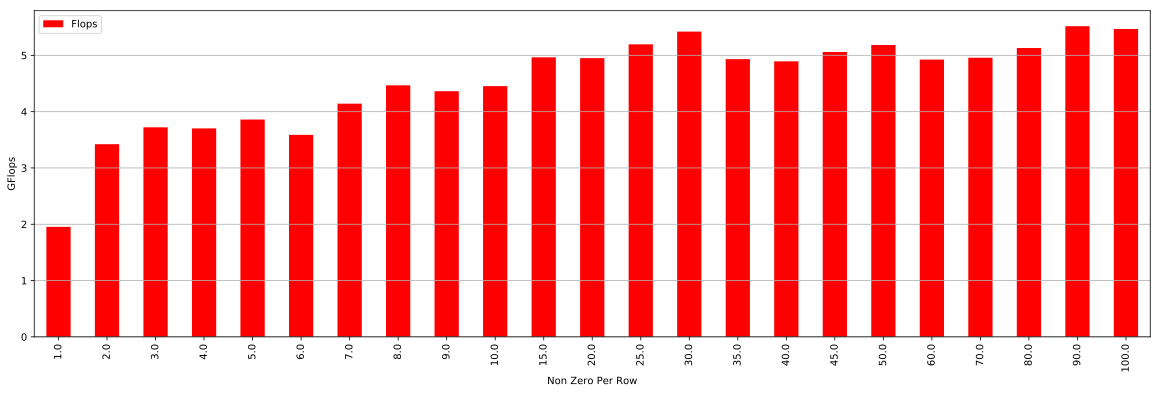

In [59]:
pdf = matplotlib.backends.backend_pdf.PdfPages("CSR5_MPI_CUDA_SpMV_500KR_1MC.pdf")
data = pd.read_csv("CSR5_cuda/CSR5_SpMV_on_GPU.csv")

data = data[data["ValueType"] == 8]
data = data[data["Partition"] == 416]
data = data[data["M"] == 500000]
data = data[data["N"] == 1000000]
data = data.groupby('NonZeroPerRow').mean()
data = data.reset_index() 
data = data.sort_values(by=["NonZeroElements"])
data = data.reset_index(drop=True) 
f = plt.figure()
ax = data.plot(kind="line", marker='o', x="NonZeroPerRow", y="AvgTime", figsize=(20,6))
ax.set_ylabel("Time in ms")
ax.set_xlabel("Non Zero Per Row")
ax.yaxis.grid()
pdf.savefig(bbox_inches = 'tight')


f = plt.figure()
ax = data.plot(kind="bar", x="NonZeroPerRow", y="Bandwidth", color='g', figsize=(20,6))
ax.set_ylabel("GBs")
ax.set_xlabel("Non Zero Per Row")
ax.yaxis.grid()
pdf.savefig(bbox_inches = 'tight')

f = plt.figure()
ax = data.plot(kind="bar", x="NonZeroPerRow", y="Flops", color='r', figsize=(20,6))
ax.set_ylabel("GFlops")
ax.set_xlabel("Non Zero Per Row")
ax.yaxis.grid()
pdf.savefig(bbox_inches = 'tight')

pdf.close()
data

,M,N,AvgTime,TotalRun,NonZeroPerRow,NonZeroElements,Bandwidth,Flops,Partition,ValueType
0,100000,200000,0.117520,1000,4.0,400000,120.632674,10.489793,416,8
1,200000,400000,0.465371,1000,4.0,800000,39.868266,3.466805,416,8
2,300000,600000,0.466944,1000,4.0,1200000,64.574207,5.615148,416,8
3,400000,800000,0.717174,1000,4.0,1600000,54.431965,4.733214,416,8
4,500000,1000000,1.148442,1000,4.0,2000000,42.581254,3.702717,416,8
5,600000,1200000,1.090099,1000,4.0,2400000,50.648263,4.404196,416,8
6,700000,1400000,1.549175,1000,4.0,2800000,42.761690,3.718408,416,8
7,800000,1600000,1.865246,1000,4.0,3200000,40.445686,3.517016,416,8
8,900000,1800000,2.007437,1000,4.0,3600000,42.002578,3.652398,416,8
9,1000000,2000000,2.346484,1000,4.0,4000000,39.927004,3.471913,416,8


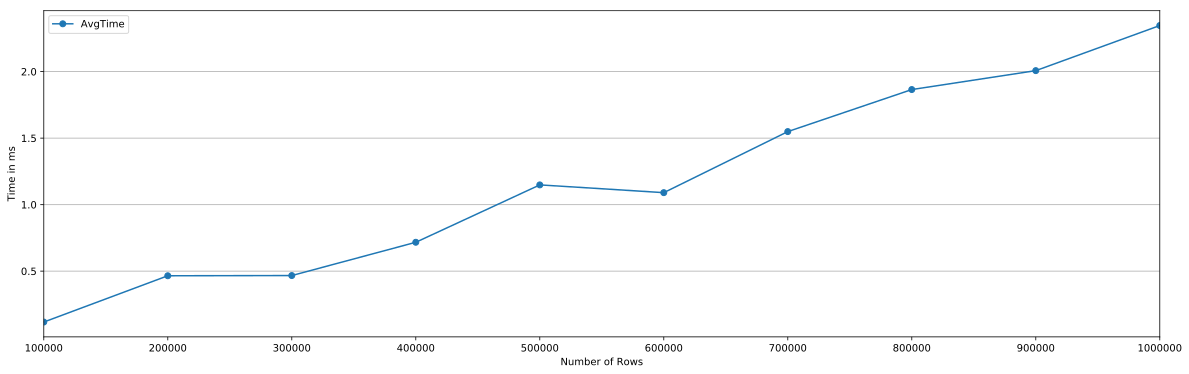

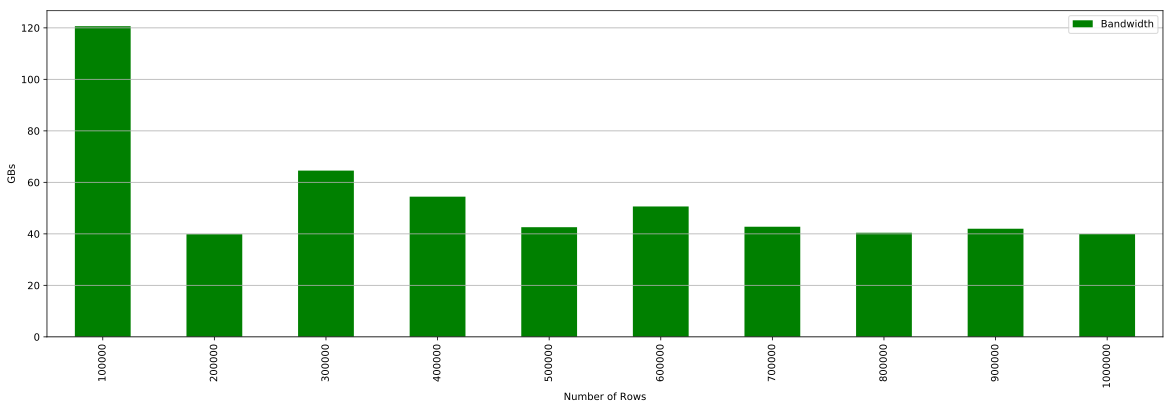

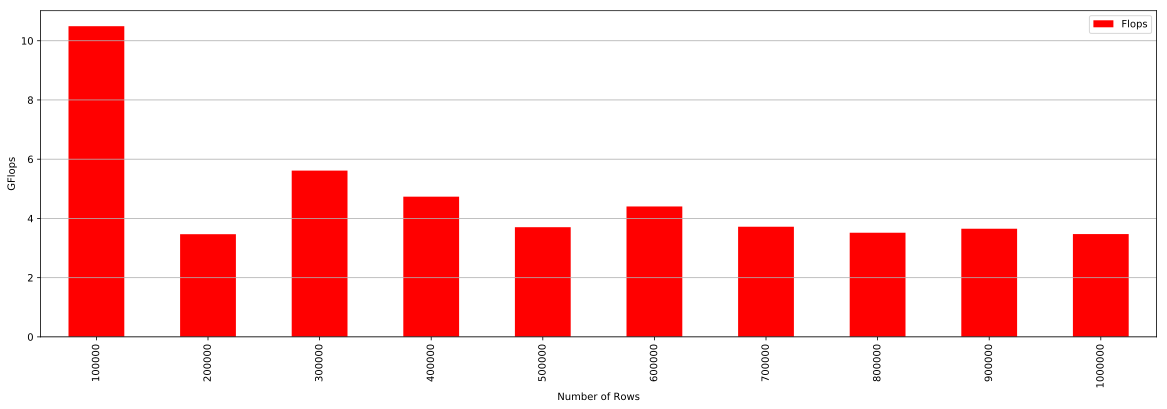

In [75]:
pdf = matplotlib.backends.backend_pdf.PdfPages("CSR5_MPI_CUDA_SpMV_4NNZ_PER_ROW.pdf")
data = pd.read_csv("CSR5_cuda/CSR5_SpMV_on_GPU.csv")

data = data[data["ValueType"] == 8]
data = data[data["Partition"] == 416]
data = data[data["NonZeroPerRow"] == 4]
data = data.groupby('M').mean()
data = data.reset_index() 
data = data.sort_values(by=["M"])
data = data.reset_index(drop=True) 
f = plt.figure()
ax = data.plot(kind="line", marker='o', x="M", y="AvgTime", figsize=(20,6))
ax.set_ylabel("Time in ms")
ax.set_xlabel("Number of Rows")
ax.yaxis.grid()
pdf.savefig(bbox_inches = 'tight')


f = plt.figure()
ax = data.plot(kind="bar", x="M", y="Bandwidth", color='g', figsize=(20,6))
ax.set_ylabel("GBs")
ax.set_xlabel("Number of Rows")
ax.yaxis.grid()
pdf.savefig(bbox_inches = 'tight')

f = plt.figure()
ax = data.plot(kind="bar", x="M", y="Flops", color='r', figsize=(20,6))
ax.set_ylabel("GFlops")
ax.set_xlabel("Number of Rows")
ax.yaxis.grid()
pdf.savefig(bbox_inches = 'tight')

pdf.close()
data

In [66]:
data = pd.read_csv("../Benchmark_SpMV_using_CSR/spmv_cuda/CSR_MPI_CUDA_SpMV.csv")
data = data[data["ValueType"] == 8]
# Synthesis Data
data = data[data["NonZeroPerRow"] == 4]
data

,Name,M,N,AvgTime,TotalRun,NonZeroPerRow,NonZeroElements,Bandwidth,Flops,ValueType
8,syn500K1M4_0,500000,1000000,0.65583,200,4.0,2000000,70.140134,6.099142,8
9,syn500K1M4_1,500000,1000000,0.65564,200,4.0,2000000,70.160460,6.100909,8
53,syn500K1M4_0,500000,1000000,0.71104,200,4.0,2000000,64.693975,5.625563,8
54,syn500K1M4_1,500000,1000000,0.71210,200,4.0,2000000,64.597674,5.617189,8
100,syn500K1M4_0,500000,1000000,0.71190,200,4.0,2000000,64.615822,5.618767,8
101,syn500K1M4_1,500000,1000000,0.71249,200,4.0,2000000,64.562315,5.614114,8


,NonZeroPerRow,M,N,AvgTime,TotalRun,NonZeroElements,Bandwidth,Flops,ValueType
0,1.0,500000,1000000,0.305237,200,500000,57.828736,3.614295,8
1,2.0,500000,1000000,0.510095,200,1000000,53.617314,4.124408,8
2,3.0,500000,1000000,0.661413,200,1500000,57.612383,4.801031,8
3,4.0,500000,1000000,0.829350,200,2000000,58.149299,5.056460,8
4,5.0,500000,1000000,1.244356,200,2500000,47.230175,4.216980,8
5,6.0,500000,1000000,1.434391,200,3000000,47.793907,4.344900,8
6,7.0,500000,1000000,1.815732,200,3500000,43.349198,3.992689,8
7,8.0,500000,1000000,2.002849,200,4000000,44.361653,4.126665,8
8,9.0,500000,1000000,2.233508,200,4500000,44.789475,4.199013,8
9,10.0,500000,1000000,2.369728,200,5000000,46.232184,4.361527,8


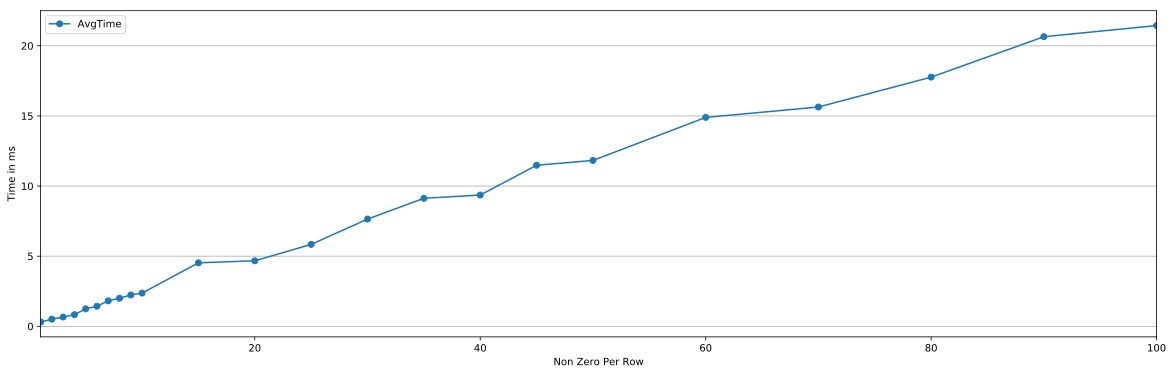

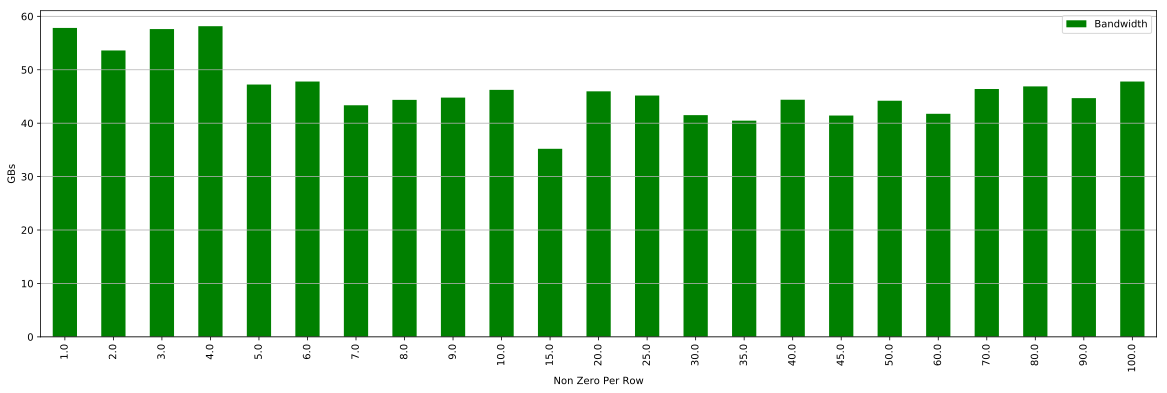

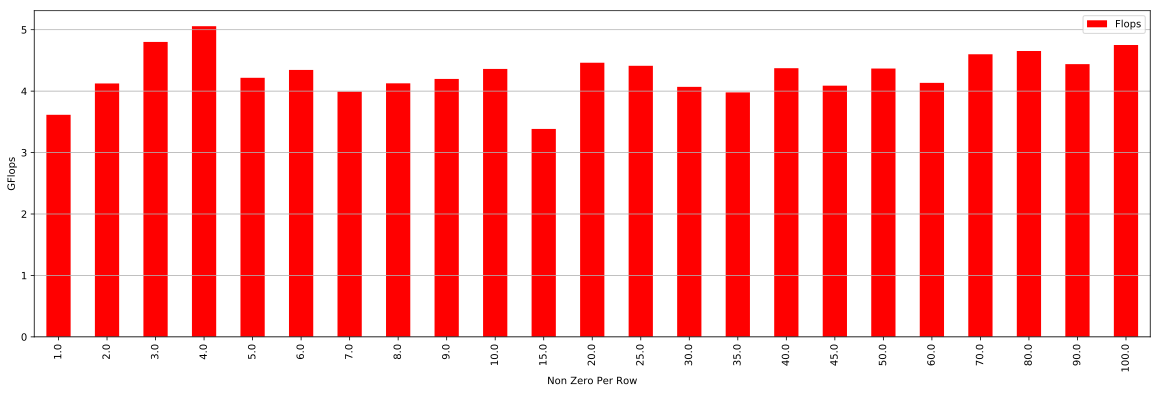

In [72]:
pdf = matplotlib.backends.backend_pdf.PdfPages("CSR_MPI_CUDA_SpMV_500KR_1MC.pdf")
data = pd.read_csv("../Benchmark_SpMV_using_CSR/spmv_cuda/CSR_MPI_CUDA_SpMV.csv")

data = data[data["ValueType"] == 8]
# data = data[data["Partition"] == 416]
# Real Data
rdata = data[data["M"] != 500000]
rdata = rdata[rdata["N"] != 1000000]
rdata = rdata.groupby('NonZeroPerRow').mean()
rdata = rdata.reset_index() 
rdata = rdata.sort_values(by=["NonZeroElements"])
rdata = rdata.reset_index(drop=True) 
# Synthesis Data
data = data[data["M"] == 500000]
data = data[data["N"] == 1000000]
data = data.groupby('NonZeroPerRow').mean()
data = data.reset_index() 
data = data.sort_values(by=["NonZeroElements"])
data = data.reset_index(drop=True) 
f = plt.figure()
ax = data.plot(kind="line", marker='o', x="NonZeroPerRow", y="AvgTime", figsize=(20,6))
ax.set_ylabel("Time in ms")
ax.set_xlabel("Non Zero Per Row")
ax.yaxis.grid()
pdf.savefig(bbox_inches = 'tight')

f = plt.figure()
ax = data.plot(kind="bar", x="NonZeroPerRow", y="Bandwidth", color='g', figsize=(20,6))
ax.set_ylabel("GBs")
ax.set_xlabel("Non Zero Per Row")
ax.yaxis.grid()
pdf.savefig(bbox_inches = 'tight')

f = plt.figure()
ax = data.plot(kind="bar", x="NonZeroPerRow", y="Flops", color='r', figsize=(20,6))
ax.set_ylabel("GFlops")
ax.set_xlabel("Non Zero Per Row")
ax.yaxis.grid()
pdf.savefig(bbox_inches = 'tight')
# ax.scatter(rdata[['NonZeroPerRow']], rdata[["AvgTime"]])
pdf.close()
data

,M,N,AvgTime,TotalRun,NonZeroPerRow,NonZeroElements,Bandwidth,Flops,ValueType
0,100000,200000,0.062362,200,4.0,400000,237.941121,20.690523,8
1,200000,400000,0.125355,200,4.0,800000,152.741623,13.281877,8
2,300000,600000,0.422720,200,4.0,1200000,75.377034,6.554524,8
3,400000,800000,0.504511,200,4.0,1600000,76.128329,6.619854,8
4,500000,1000000,0.829350,200,4.0,2000000,58.149299,5.056460,8
5,600000,1200000,1.042881,200,4.0,2400000,54.146523,4.708393,8
6,700000,1400000,1.097993,200,4.0,2800000,58.955500,5.126565,8
7,800000,1600000,1.419584,200,4.0,3200000,52.480751,4.563543,8
8,900000,1800000,1.620244,200,4.0,3600000,51.588791,4.485982,8
9,1000000,2000000,1.837948,200,4.0,4000000,50.508149,4.392013,8


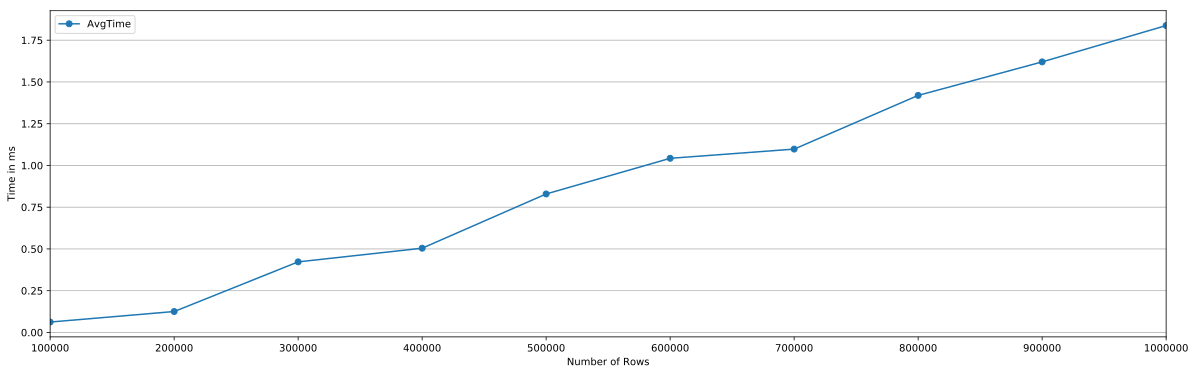

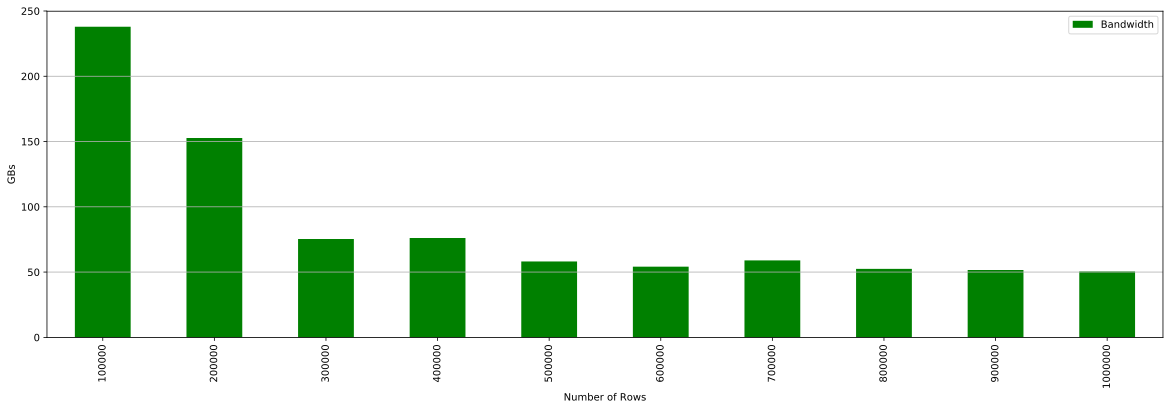

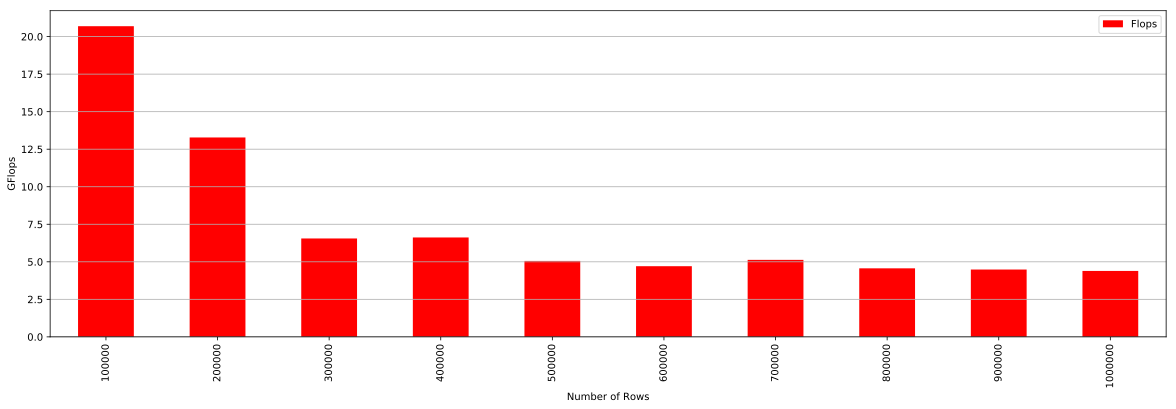

In [80]:
pdf = matplotlib.backends.backend_pdf.PdfPages("CSR_MPI_CUDA_SpMV_4NNZ_PER_ROW.pdf")
data = pd.read_csv("../Benchmark_SpMV_using_CSR/spmv_cuda/CSR_MPI_CUDA_SpMV.csv")

data = data[data["ValueType"] == 8]
# Synthesis Data
data = data[data["NonZeroPerRow"] == 4]
data = data.groupby('M').mean()
data = data.reset_index() 
data = data.sort_values(by=["M"])
data = data.reset_index(drop=True) 
f = plt.figure()
ax = data.plot(kind="line", marker='o', x="M", y="AvgTime", figsize=(20,6))
ax.set_ylabel("Time in ms")
ax.set_xlabel("Number of Rows")
ax.yaxis.grid()
pdf.savefig(bbox_inches = 'tight')

f = plt.figure()
ax = data.plot(kind="bar", x="M", y="Bandwidth", color='g', figsize=(20,6))
ax.set_ylabel("GBs")
ax.set_xlabel("Number of Rows")
ax.yaxis.grid()
pdf.savefig(bbox_inches = 'tight')

f = plt.figure()
ax = data.plot(kind="bar", x="M", y="Flops", color='r', figsize=(20,6))
ax.set_ylabel("GFlops")
ax.set_xlabel("Number of Rows")
ax.yaxis.grid()
pdf.savefig(bbox_inches = 'tight')
# ax.scatter(rdata[['NonZeroPerRow']], rdata[["AvgTime"]])
pdf.close()
data

In [84]:
data = pd.read_csv("../Benchmark_SpMV_using_CSR/spmv_cuda/CSR_MPI_CUDA_SpMV.csv")
# Real Data
rdata = data[data["M"] != 500000]
rdata = rdata[rdata["N"] != 1000000]
rdata = rdata[rdata['NonZeroPerRow'] != 4]
rdata = rdata.groupby('NonZeroPerRow').mean()
rdata = rdata.reset_index() 
rdata = rdata.sort_values(by=["NonZeroElements"])
rdata = rdata.reset_index(drop=True) 
rdata

,NonZeroPerRow,M,N,AvgTime,TotalRun,NonZeroElements,Bandwidth,Flops,ValueType
0,7.998750,11999,11999,0.007133,200,95977,295.551390,27.492800,8
1,3.835031,80209,80209,1.214048,200,307604,6.409566,0.554243,8
2,7.986301,74752,74752,0.110053,200,596992,157.086769,14.610970,8
3,66.025521,16614,16614,0.095296,200,1096948,294.128689,29.147984,8
4,3.186670,479119,515905,0.227132,200,1526794,206.643124,17.390038,8
5,3.809862,1447360,1447360,0.885204,200,5514242,169.777053,14.667741,8
6,2.999340,21198119,21198119,15.273494,200,63580358,102.639389,8.552969,8
7,14.734162,5363260,5363260,17.738872,200,79023142,92.724217,8.909607,8
8,19.243892,5154859,5154859,5.512784,200,99199551,371.110147,35.988926,8
9,76.281421,3072441,3072441,66.906189,200,234370166,70.610479,7.005942,8


In [ ]:
matrices = [
    ''
]
